In [6]:
import pandas as pd

In [7]:
gender = "men"
df = pd.read_csv(f"data/100m_{gender}_filtered.csv")
df.head()

,Mark,WIND,Competitor,Nat,Venue,Date,Speed
0,9.5800,0.9,Usain BOLT,JAM,"Olympiastadion, Berlin (GER)",2009-08-16,37.578288
1,9.6875,-0.1,Yohan BLAKE,JAM,"Stade Olympique de la Pontaise, Lausanne (SUI)",2012-08-23,37.161290
2,9.6925,2.0,Tyson GAY,USA,Shanghai (CHN),2009-09-20,37.142120
3,9.7000,0.0,Michael HERRERA,CUB,La Habana (CUB),2010-03-19,37.113402
4,9.7200,0.2,Asafa POWELL,JAM,"Stade Olympique de la Pontaise, Lausanne (SUI)",2008-09-02,37.037037


In [8]:
# get the personal bests of all competitors over the years and sort them from lowest to largest
personal_bests = df.Speed.sort_values().to_numpy()

In [9]:
from numpy import log
import random
from typing import List

def m_n(r: int, k: int, X: List[float]) -> float:
    """Calculates result of helper functions of the moment estimator"""
    return 1/(k) * sum([(log(X[(n-1)-i]) - log(X[(n-1)-k]))**r for i in range(0, k)])
                      

def moment_estimator(k: int, X: pd.Series) -> float:
    """Returns result of the moment estimator"""
    return m_n(1, k, X) + 1 - 1/2*(1- (m_n(1, k, X)**2)/m_n(2, k, X))

In [11]:
n = len(personal_bests)
X = personal_bests
# calculate all estimator for all k from 2, n-1
moment_estimators = [moment_estimator(k, X) for k in range(2, n)]

In [12]:
import matplotlib.pyplot as plt
import numpy as np

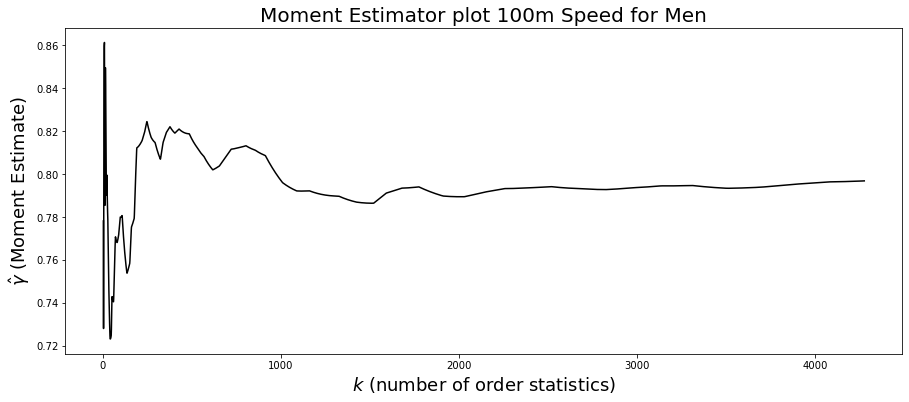

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2,n), moment_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Moment Estimate)", fontsize=18)
plt.title(f"Moment Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/Moment_Estimator_{gender.title()}")
plt.show()

In [14]:
def hill_estimator(k: int, X: List[float]) -> float:
    """calculates the hill estimator for a given sample size k"""
    return 1/k * sum([log(X[(n-1)-i]) - log(X[(n-1)-k]) for i in range(k)])

In [15]:
hill_estimators = [hill_estimator(k, X) for k in range(2, n)]

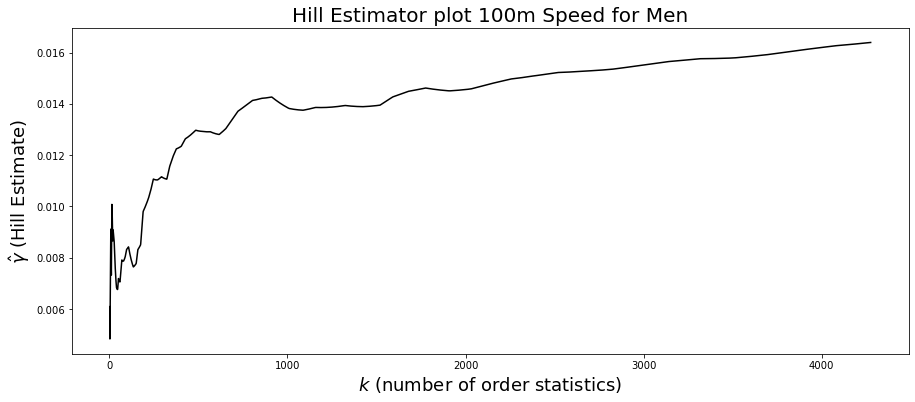

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2,n), hill_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Hill Estimate)", fontsize=18)
plt.title(f"Hill Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/Hill_Estimator_{gender.title()}")
plt.show()